In [311]:
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from datetime import datetime
import math

# Data
**Start:** 04.1969  
**End:** 08.2022  
**Interval:** Monthly  
Data: stooq.com

In [195]:
csv = pd.read_csv('data/spx_m.csv')
df = csv
df

,Date,Open,High,Low,Close,Volume
0,1969-06-30,103.46,103.75,95.21,97.71,1.306278e+08
1,1969-07-31,97.71,100.33,88.04,91.83,1.268056e+08
2,1969-08-31,91.92,96.43,91.48,95.51,1.120444e+08
3,1969-09-30,95.51,96.62,91.77,93.12,1.217500e+08
4,1969-10-31,93.12,98.83,91.66,97.12,1.722833e+08
...,...,...,...,...,...,...
634,2022-04-30,4540.32,4593.45,4124.28,4131.93,4.920787e+10
635,2022-05-31,4130.61,4307.66,3810.32,4132.15,5.529092e+10
636,2022-06-30,4149.78,4177.51,3636.87,3785.38,5.294019e+10
637,2022-07-31,3781.00,4140.15,3721.56,4130.29,4.491820e+10


In [194]:
len(csv)

639

In [305]:
low = min(df['Close'])
high = max(df['Close'])

In [319]:
fixed_ticks = [low]
next_round = math.ceil(low/100)*100
prelast_round = math.floor(high/100)*100
fixed_ticks += range(next_round, prelast_round+100, 500)
fixed_ticks.append(high)
fixed_ticks

[63.54, 100, 600, 1100, 1600, 2100, 2600, 3100, 3600, 4100, 4600, 4766.18]

In [320]:
DATES_INTERVAL = df.shape[0]//10

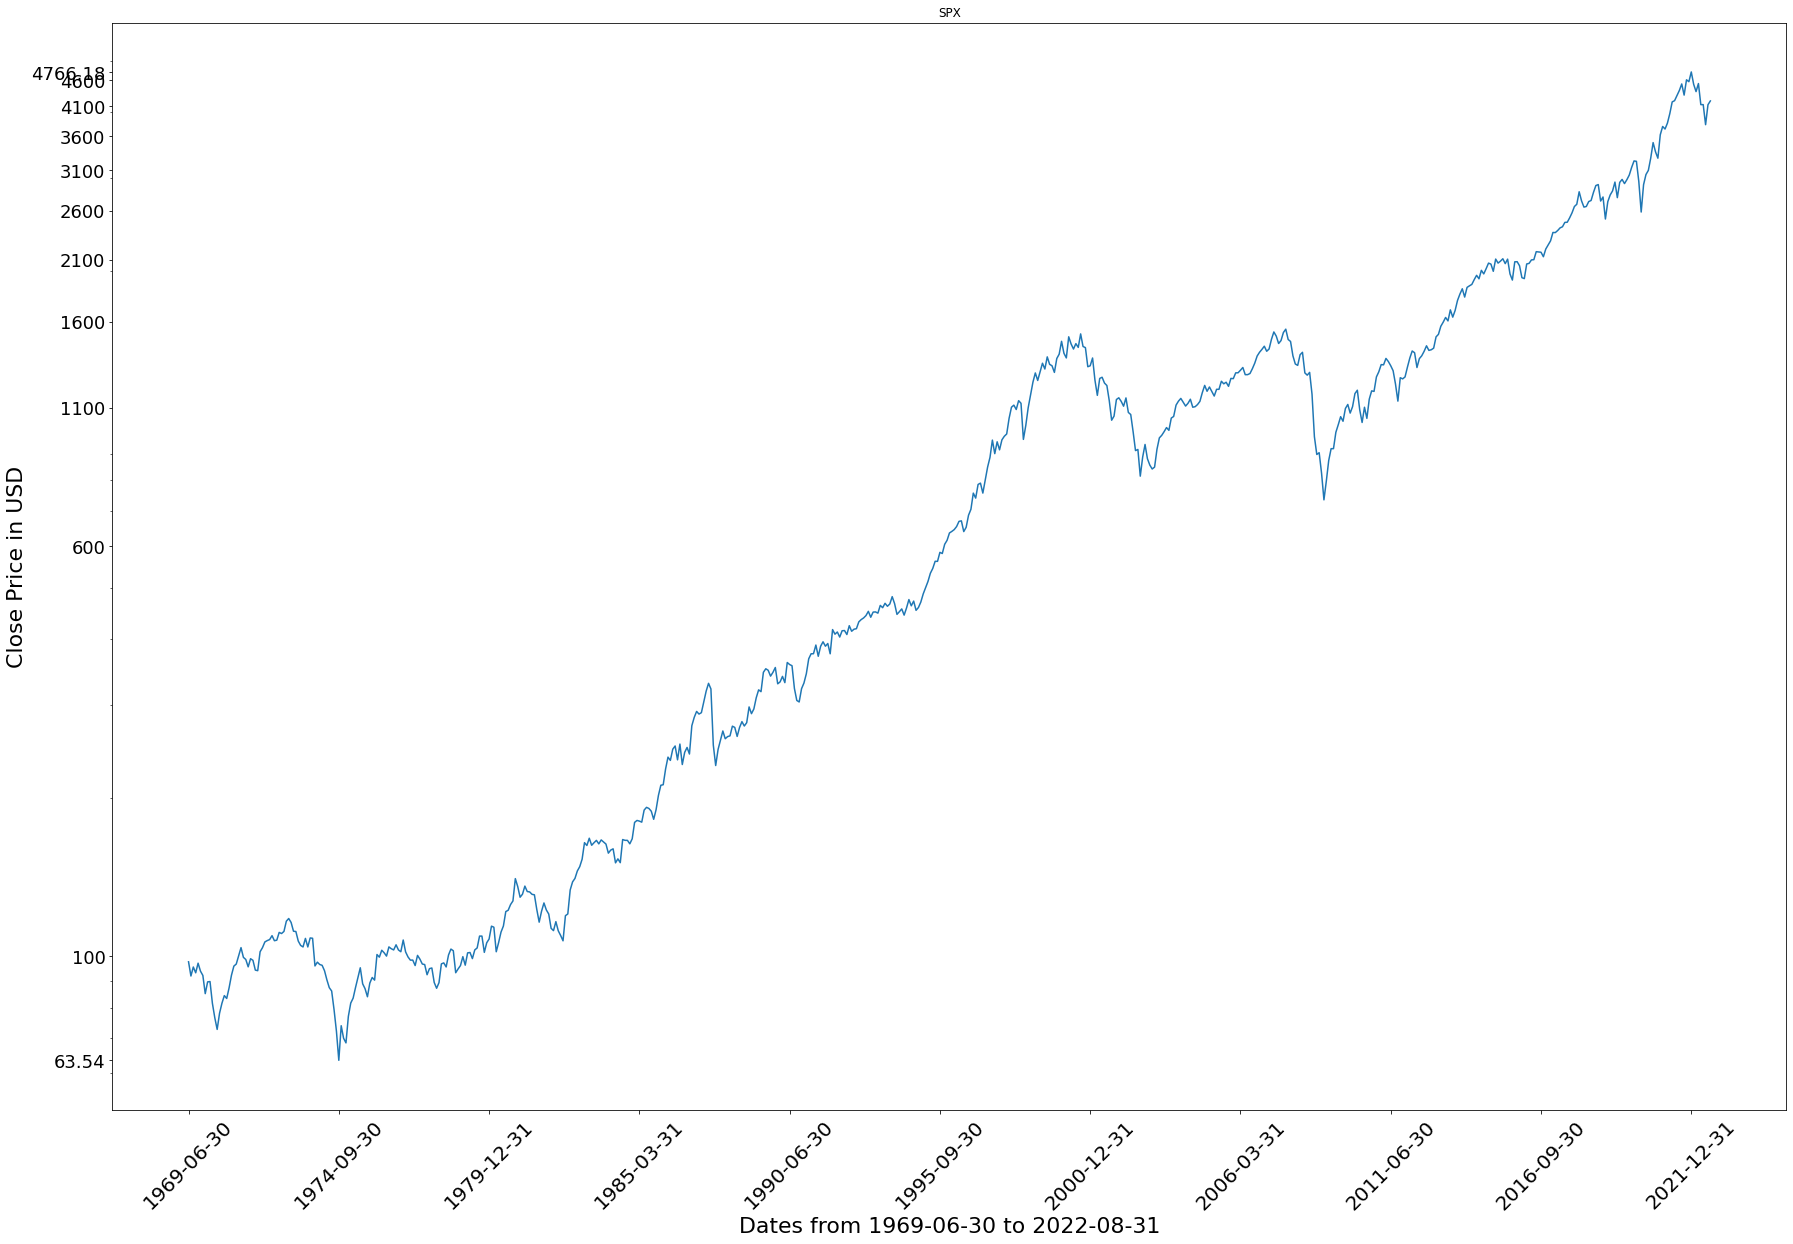

In [322]:
fig, ax = plt.subplots(figsize=(30,20))
plt.plot(range(df.shape[0]), df['Close'])

plt.yscale('log')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax.yaxis.set_major_locator(ticker.FixedLocator(fixed_ticks))


plt.xticks(range(0, df.shape[0], DATES_INTERVAL), df['Date'].loc[::DATES_INTERVAL], rotation=45, fontsize=20)
plt.yticks(fontsize=18)

plt.title('SPX')
plt.xlabel(f'Dates from {dates[0]} to {dates[-1]}', fontsize=22)
plt.ylabel('Close Price in USD', fontsize=22)
plt.show()